<img src="../images/QISKit-c.gif" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="250 px" align="left">

# Beginner's Guide
This is meant as a companion for the SDK to the different composer examples in the [Beginners Guide](https://quantumexperience.ng.bluemix.net/qx/tutorial?sectionId=beginners-guide&page=introduction). All examples run with the local default simulation backend. You can import your Qconfig and configure the API if you would like to run on a real device. 

All images are from the beginners guide in the referenced sections. This does not include the detailed text of the beginners guide. It is designed to show how the composer examples can be executed with the SDK.

***
### Contributors
Evan Kepner

In [1]:
import os
import sys

from IPython.display import Image

from qiskit import QuantumProgram
from qiskit.tools.visualization import plot_histogram

assert sys.version_info >= (3,5), "Only Python 3.5 or greater supported."

# Helper functions
These are used throughout the tutorial as helper functions. These are used to display local images for the composer references and the execute and plot circuits in the quantum program.

In [2]:
def show_image(img_name):
    """Display an image in the notebook.
    
    This is set to the default path of the root of the tutorials repo
    images directory in the sub-folder 'intro_img'.
    
    Args:
        img_name (str): file name to display
    """
    return Image(filename=os.path.join("..", "images", "intro_img", img_name))

def execute_and_plot(qp, circuits):
    """Executes and plot the histograms with default settings.
    
    Args:
        qp: QuantumProgram containing the circuits
        circuits (list): list of circuits to execute
    """
    results = qp.execute(circuits)
    
    for circuit in circuits:
        print(circuit)
        plot_histogram(results.get_counts(circuit))

# Quantum Program Setup
We're starting with a single quibit and classical register.

In [3]:
qp = QuantumProgram()

n = 1  # number of qubits
q = qp.create_quantum_register("q", n)
c = qp.create_classical_register("c", n)

# Single-Qubit Gates
Composer examples from the [Beginners Guide](https://quantumexperience.ng.bluemix.net/qx/tutorial?sectionId=beginners-guide&page=005-Single-Qubit_Gates~2F001-Single-Qubit_Gates).

## X-gate

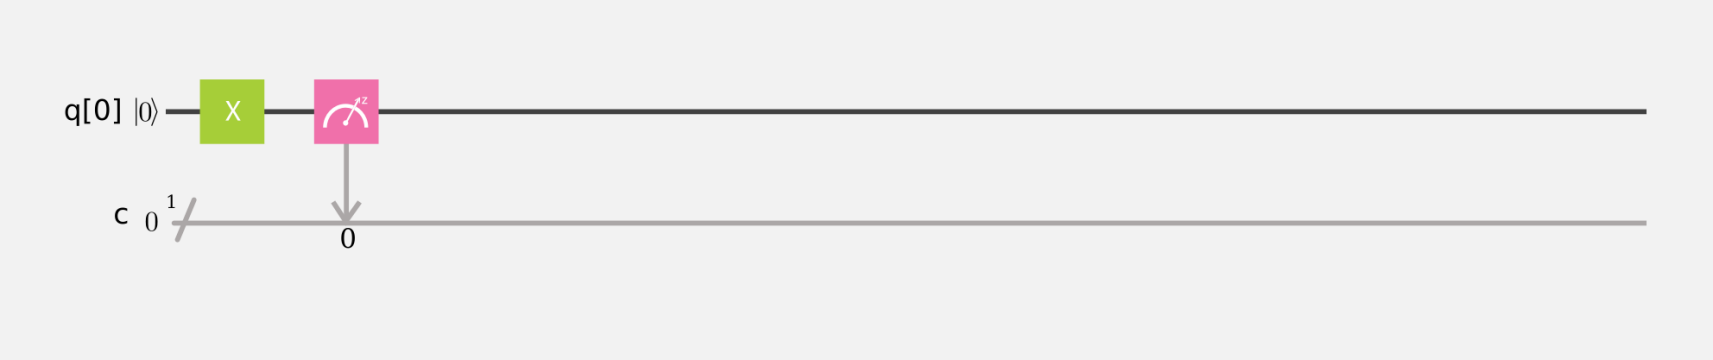

In [4]:
show_image("single_q_x_gate.png")

single_x


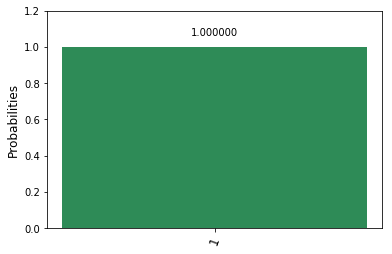

In [5]:
single_x = qp.create_circuit("single_x", [q], [c])
single_x.x(q[0])
single_x.measure(q[0], c[0])
execute_and_plot(qp, ["single_x"])

# Creating superposition
Composer examples from the [creating superposition](https://quantumexperience.ng.bluemix.net/qx/tutorial?sectionId=beginners-guide&page=005-Single-Qubit_Gates~2F002-Creating_superposition) section.

## H-gate

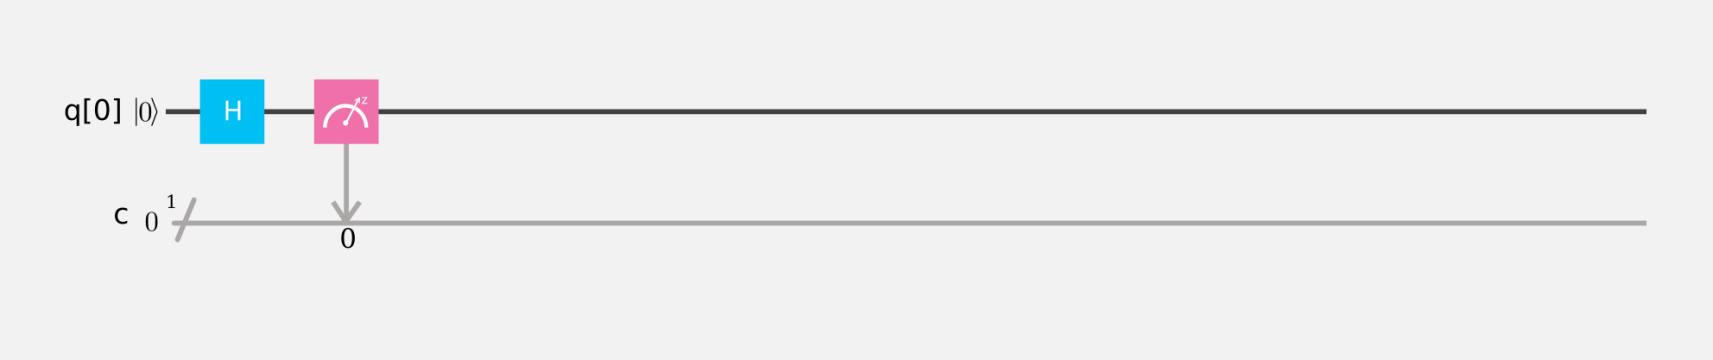

In [6]:
show_image("single_q_h_gate_0.png")

single_h


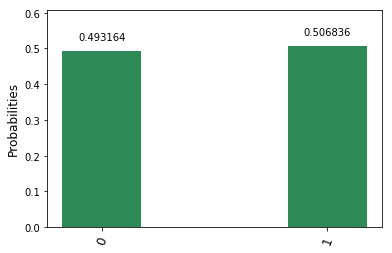

In [7]:
single_h = qp.create_circuit("single_h", [q], [c])
single_h.h(q[0])
single_h.measure(q[0], c[0])
execute_and_plot(qp, ["single_h"])

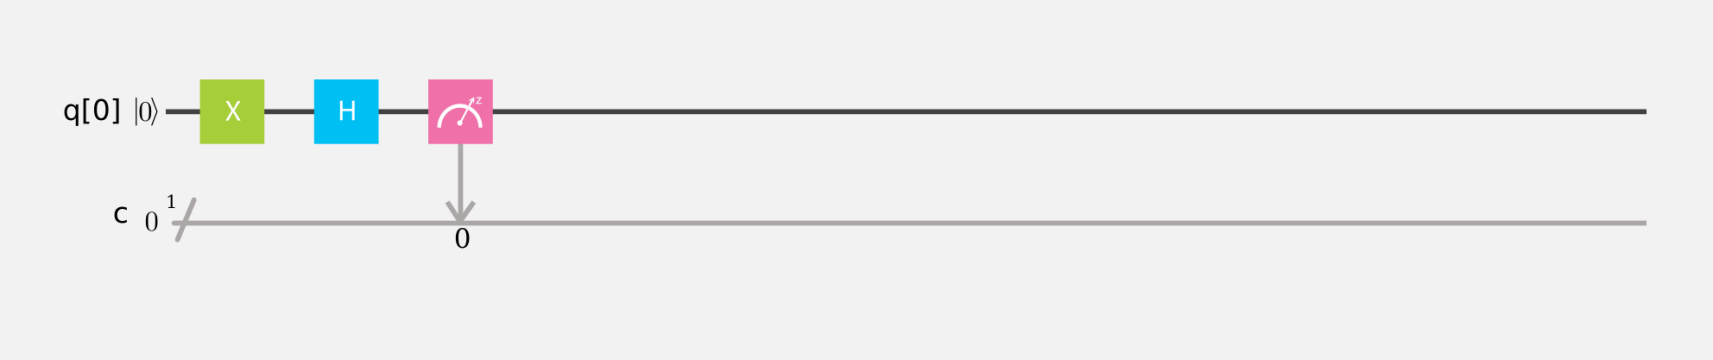

In [8]:
show_image("single_q_h_gate_1.png")

single_xh


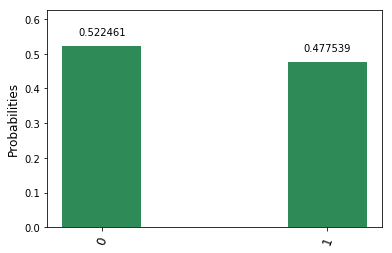

In [9]:
single_xh = qp.create_circuit("single_xh", [q], [c])
single_xh.x(q[0])
single_xh.h(q[0])
single_xh.measure(q[0], c[0])
execute_and_plot(qp, ["single_xh"])

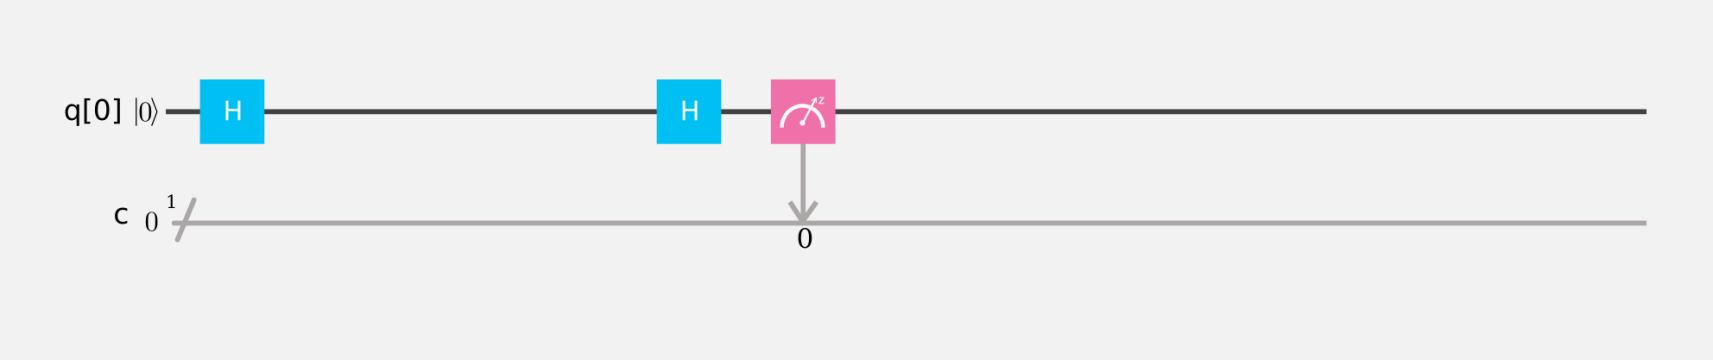

In [10]:
show_image("single_q_h_gate_2.png")

single_hh


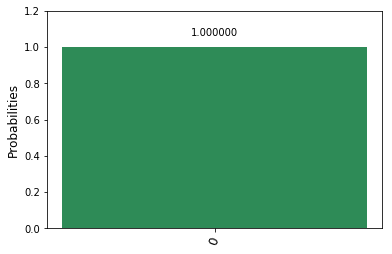

In [11]:
# This is the |+> state
single_hh = qp.create_circuit("single_hh", [q], [c])
single_hh.h(q[0])
single_hh.h(q[0])
single_hh.measure(q[0], c[0])
execute_and_plot(qp, ["single_hh"])

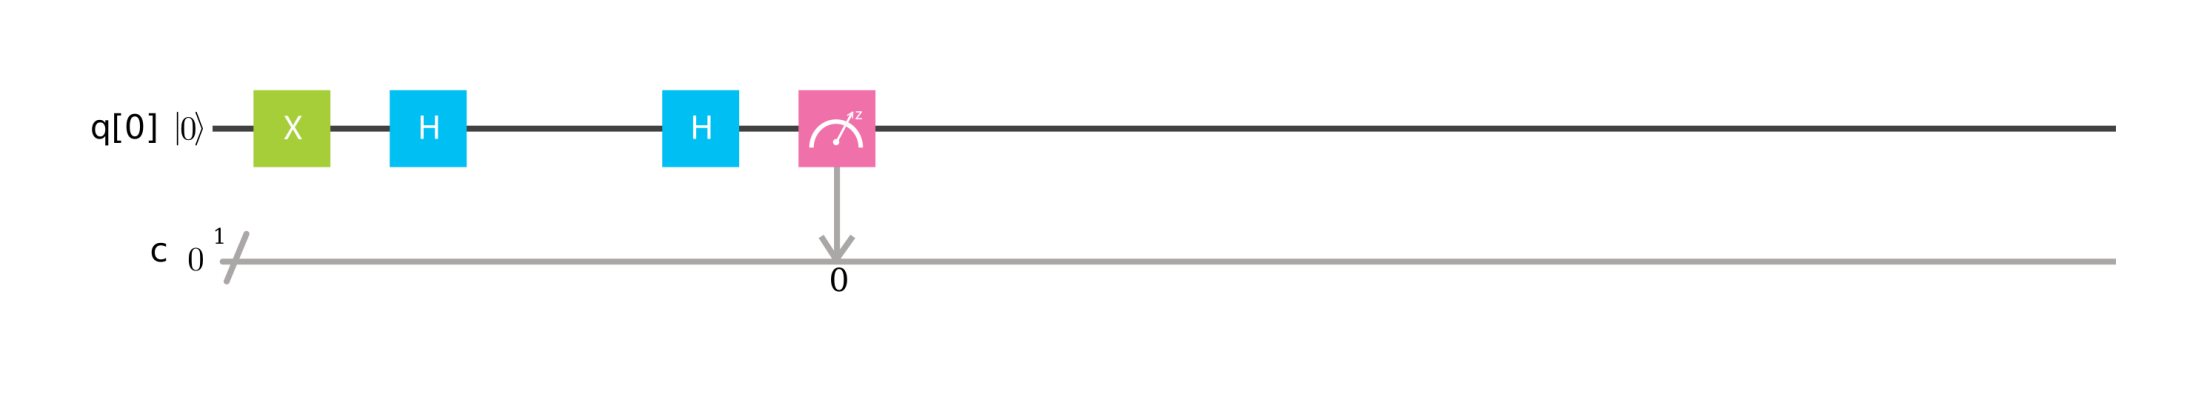

In [12]:
show_image("single_q_h_gate_3.png")

single_xhh


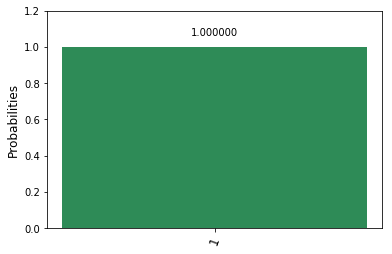

In [13]:
# This is the |-> state
single_xhh = qp.create_circuit("single_xhh", [q], [c])
single_xhh.x(q[0])
single_xhh.h(q[0])
single_xhh.h(q[0])
single_xhh.measure(q[0],c[0])
execute_and_plot(qp, ["single_xhh"])

# Introducing qubit phase
These are the composer examples from [introducing qubit phase](https://quantumexperience.ng.bluemix.net/qx/tutorial?sectionId=beginners-guide&page=005-Single-Qubit_Gates~2F005-Introducing_qubit_phase).

## Z-gate

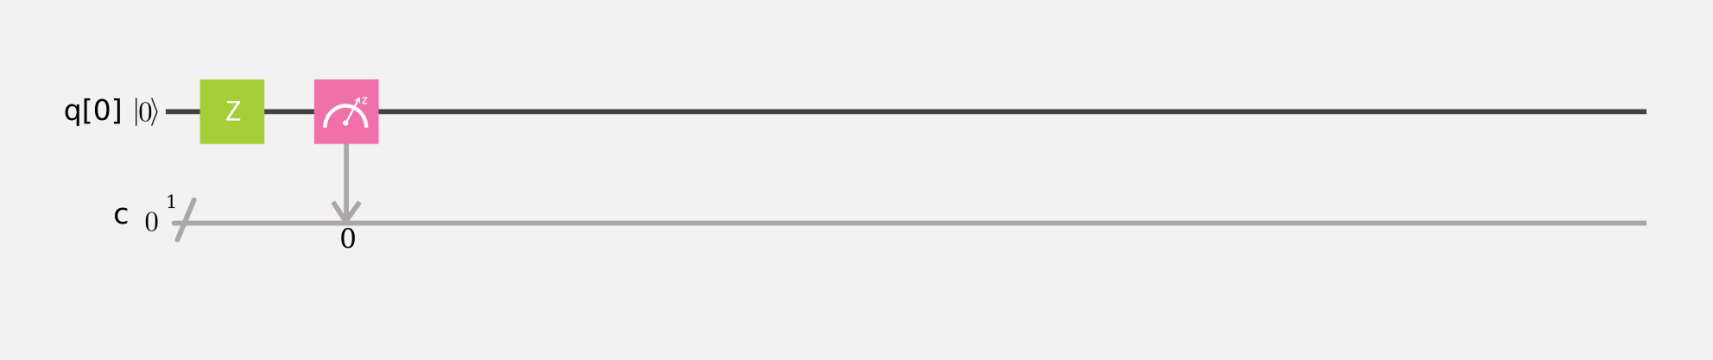

In [14]:
show_image("single_q_z_gate_0.png")

single_z


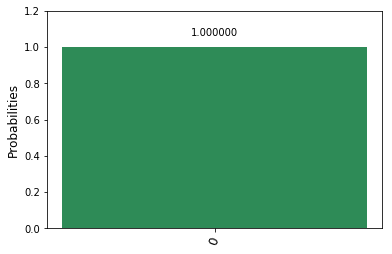

In [15]:
single_z = qp.create_circuit("single_z", [q], [c])
single_z.z(q[0])
single_z.measure(q[0],c[0])
execute_and_plot(qp, ["single_z"])

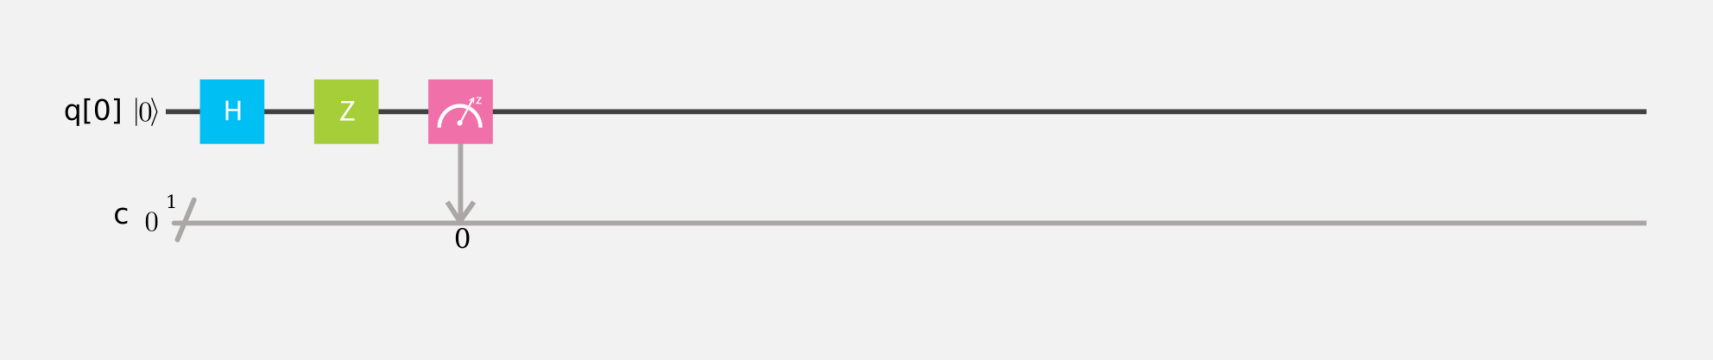

In [16]:
show_image("single_q_z_gate_1.png")

single_zh


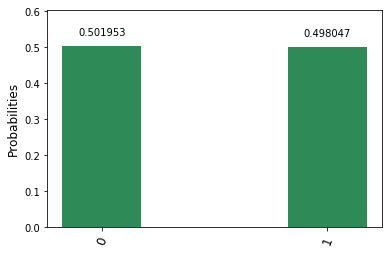

In [17]:
single_zh = qp.create_circuit("single_zh", [q], [c])
single_zh.h(q[0])
single_zh.z(q[0])
single_zh.measure(q[0],c[0])
execute_and_plot(qp, ["single_zh"])

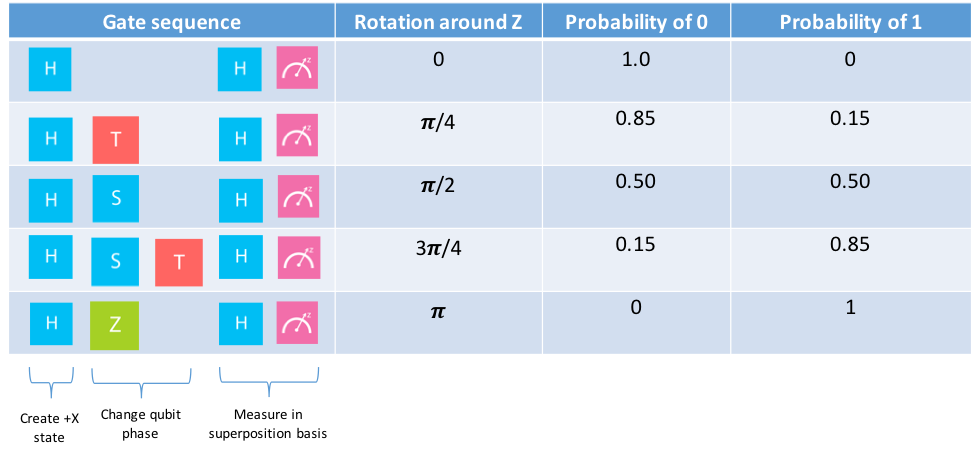

In [18]:
show_image("single_q_z_gate_tbl.png")

phs_0


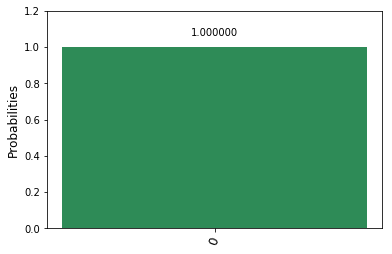

phs_pi4


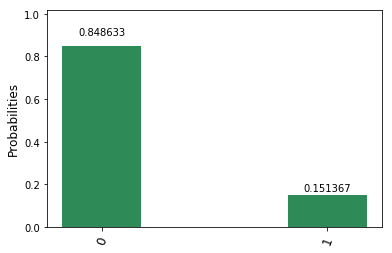

phs_pi2


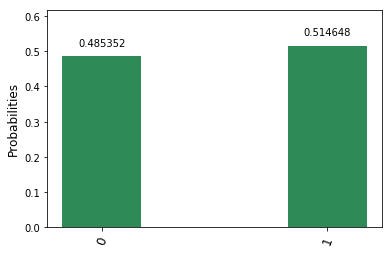

phs_3pi4


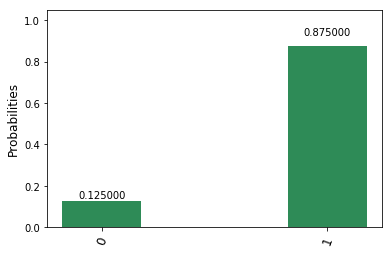

phs_pi


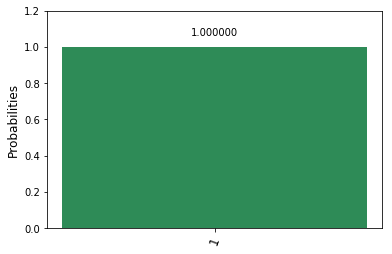

In [19]:
# 0 rotation around z, Pr(0) = 1.0
phs_0 = qp.create_circuit("phs_0", [q], [c])
phs_0.h(q[0])
phs_0.h(q[0])  # for x-basis measurement
phs_0.measure(q[0], c[0])

# pi/4 rotation around z, Pr(0) = 0.85
phs_pi4 = qp.create_circuit("phs_pi4", [q], [c])
phs_pi4.h(q[0])
phs_pi4.t(q[0])
phs_pi4.h(q[0])  # for x-basis measurement
phs_pi4.measure(q[0], c[0])

# pi/2 rotation around z, Pr(0) = 0.5
phs_pi2 = qp.create_circuit("phs_pi2", [q], [c])
phs_pi2.h(q[0])
phs_pi2.s(q[0])
# Alternate example gate:
#phs_pi2.sdg(q[0])  #rotation -pi/2 using sdg instead of s
phs_pi2.h(q[0])  # for x-basis measurement
phs_pi2.measure(q[0], c[0])

# 3pi/4 rotation around z, Pr(0) = 0.15
phs_3pi4 = qp.create_circuit("phs_3pi4", [q], [c])
phs_3pi4.h(q[0])
phs_3pi4.s(q[0])
phs_3pi4.t(q[0])
phs_3pi4.h(q[0])  # for x-basis measurement
phs_3pi4.measure(q[0], c[0])

# pi rotation around z, Pr(0) = 0
phs_pi = qp.create_circuit("phs_pi", [q], [c])
phs_pi.h(q[0])
phs_pi.z(q[0])
phs_pi.h(q[0])  # for measurement
phs_pi.measure(q[0], c[0])

execute_and_plot(qp, ["phs_0", "phs_pi4", "phs_pi2",
                      "phs_3pi4", "phs_pi"])

# Multi quibit gates
Composer examples from [multi qubit gates](https://quantumexperience.ng.bluemix.net/qx/tutorial?sectionId=beginners-guide&page=006-Multi-Qubit_Gates~2F001-Multi-Qubit_Gates) section. We set up new registers that have two qubits and classical components using the same quantum program.

In [20]:
n = 2  # number of qubits
q2 = qp.create_quantum_register("q2", n)
c2 = qp.create_classical_register("c2", n)

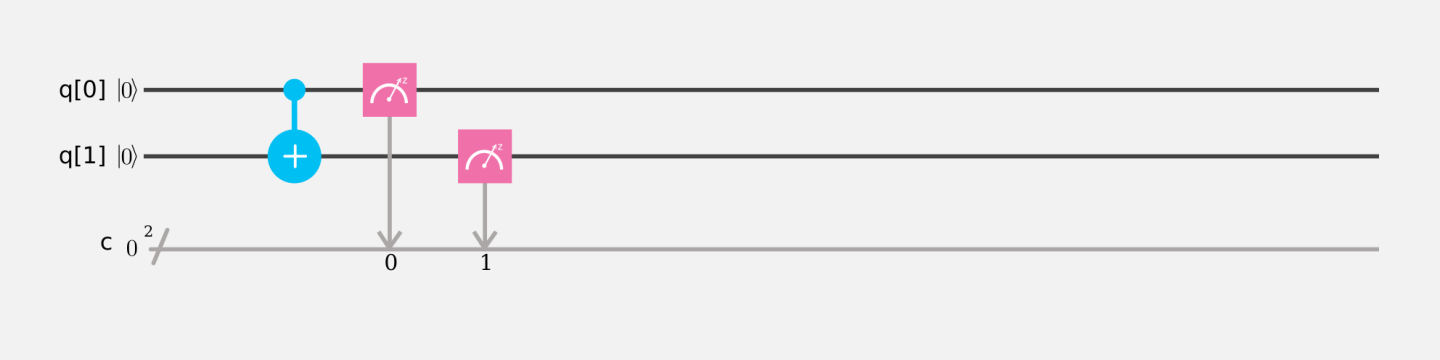

In [21]:
show_image("multi_q_0.png")

cnot_00


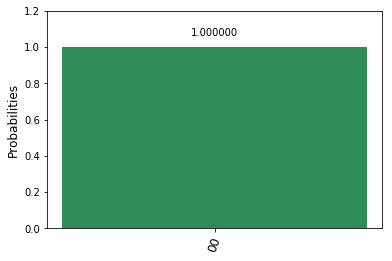

In [22]:
# |00> -- |00>
cnot_00 = qp.create_circuit("cnot_00", [q2], [c2])
cnot_00.cx(q2[0], q2[1])
cnot_00.measure(q2[0], c2[0])
cnot_00.measure(q2[1], c2[1])
execute_and_plot(qp, ["cnot_00"])

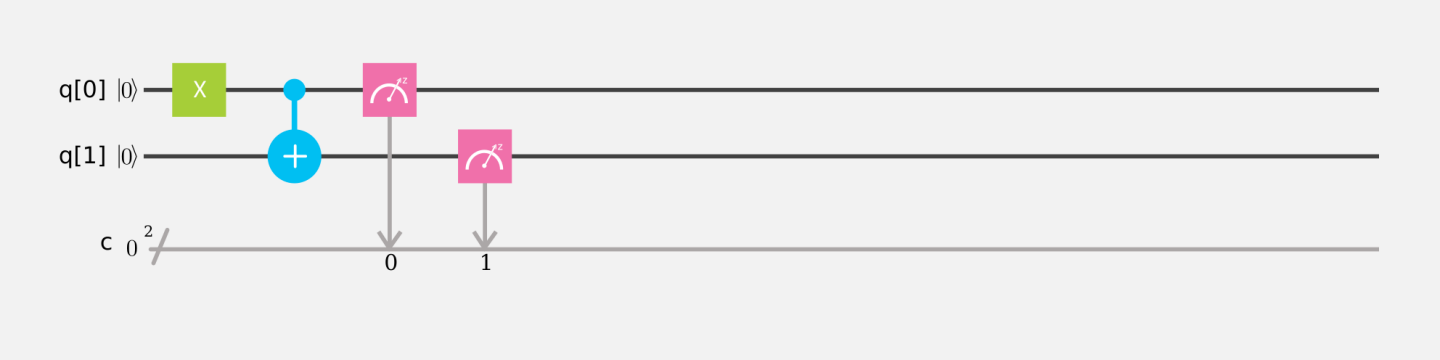

In [23]:
show_image("multi_q_1.png")

cnot_01


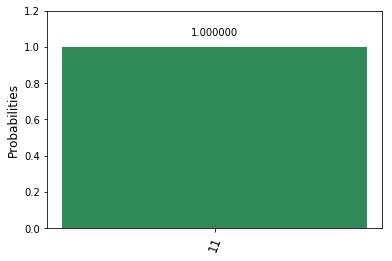

In [24]:
# |01> -- |11>
cnot_01 = qp.create_circuit("cnot_01", [q2], [c2])
cnot_01.x(q2[0])
cnot_01.cx(q2[0], q2[1])
cnot_01.measure(q2[0], c2[0])
cnot_01.measure(q2[1], c2[1])
execute_and_plot(qp, ["cnot_01"])

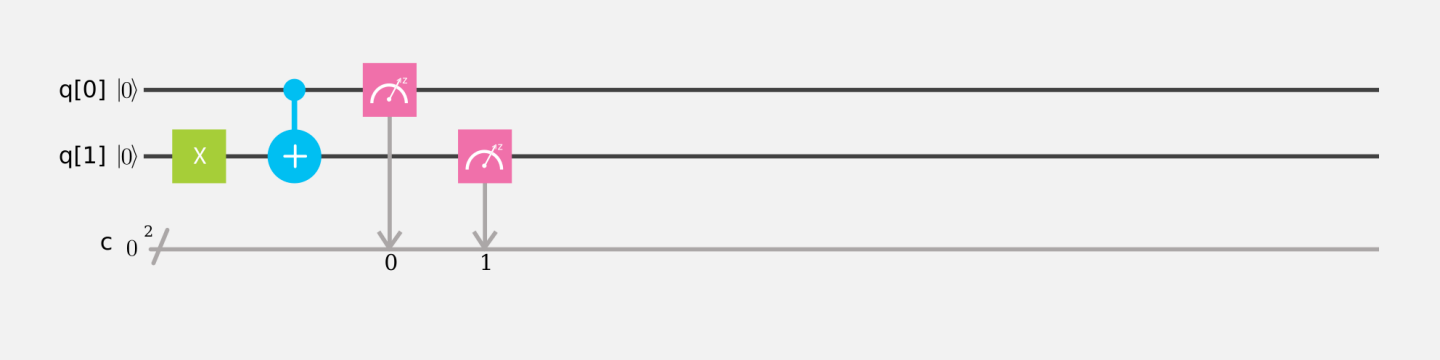

In [25]:
show_image("multi_q_2.png")

cnot_10


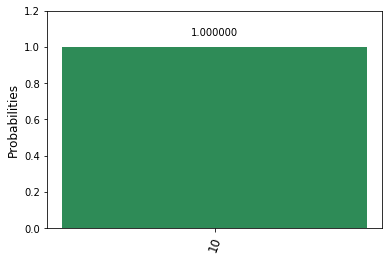

In [26]:
# |10> -- |10>
cnot_10 = qp.create_circuit("cnot_10", [q2], [c2])
cnot_10.x(q2[1])
cnot_10.cx(q2[0], q2[1])
cnot_10.measure(q2[0], c2[0])
cnot_10.measure(q2[1], c2[1])
execute_and_plot(qp, ["cnot_10"])

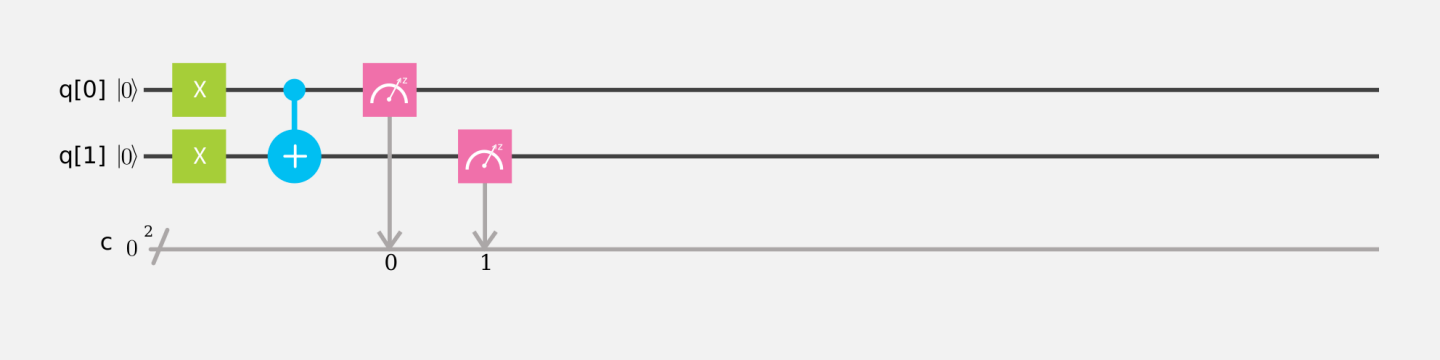

In [27]:
show_image("multi_q_3.png")

cnot_11


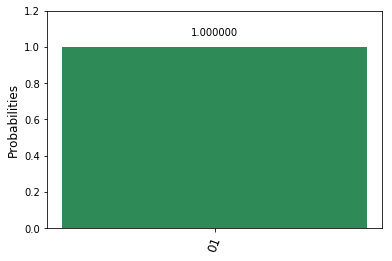

In [28]:
# |11> -- |01>
cnot_11 = qp.create_circuit("cnot_11", [q2], [c2])
cnot_11.x(q2[0])
cnot_11.x(q2[1])
cnot_11.cx(q2[0], q2[1])
cnot_11.measure(q2[0], c2[0])
cnot_11.measure(q2[1], c2[1])
execute_and_plot(qp, ["cnot_11"])

# Entanglement
These are the [entanglemnt section](https://quantumexperience.ng.bluemix.net/qx/tutorial?sectionId=beginners-guide&page=007-Entanglement~2F001-Entanglement) composer examples.

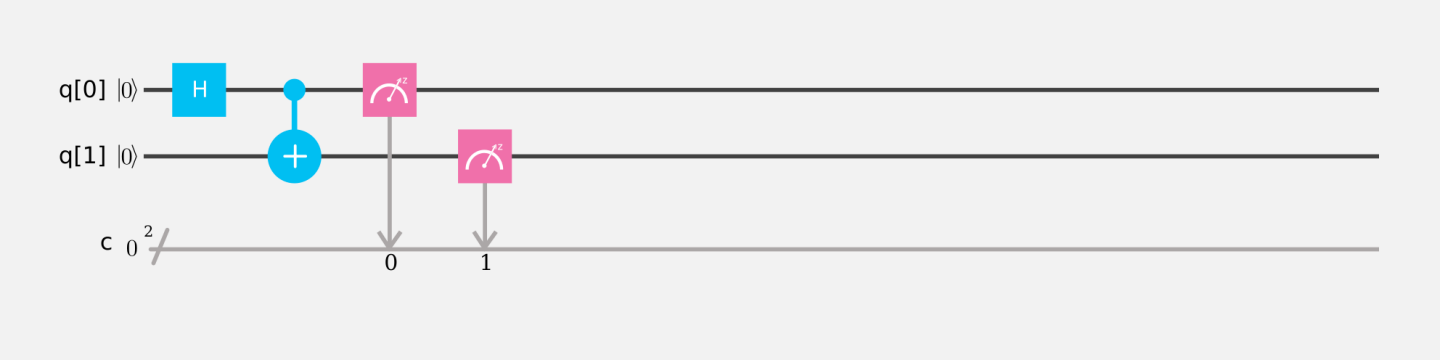

In [29]:
show_image("ent_q_0.png")

e0


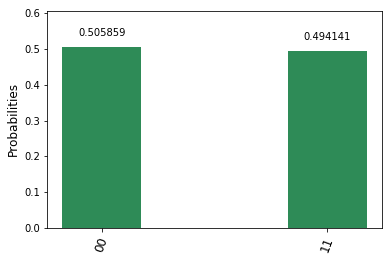

In [30]:
e0 = qp.create_circuit("e0", [q2], [c2])
e0.h(q2[0])  # apply H-gate for superposition to q0
e0.cx(q2[0], q2[1])  # apply CNOT control from q0 to q1
e0.measure(q2[0], c2[0])
e0.measure(q2[1], c2[1])
execute_and_plot(qp, ["e0"])

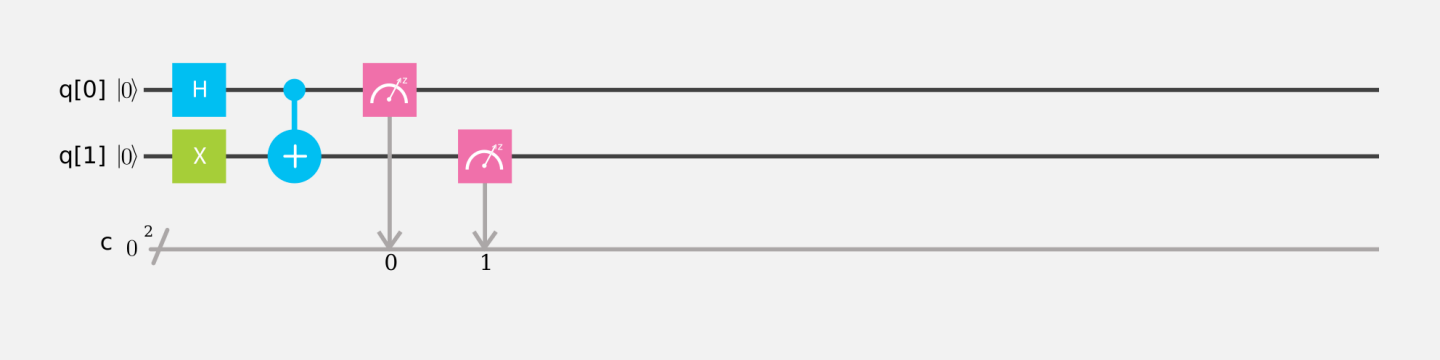

In [31]:
show_image("ent_q_1.png")

e1


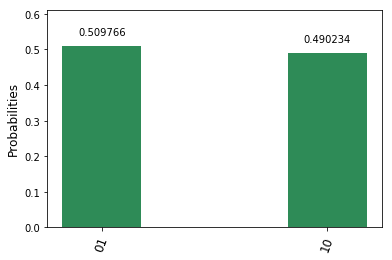

In [32]:
e1 = qp.create_circuit("e1", [q2], [c2])
e1.h(q2[0])  # apply H-gate on q0 for superposition
e1.x(q2[1])  # apply x-gate on q1
e1.cx(q2[0], q2[1])  # apply CNOT control from q0 to q1
e1.measure(q2[0], c2[0])
e1.measure(q2[1], c2[1])
execute_and_plot(qp, ["e1"])

In [1]:
%run "../version.ipynb"

Package,Version
QISKit,0.4.8
IBMQuantumExperience,>= 1.8.26
numpy,">= 1.13, < 1.14"
scipy,">= 0.19, < 0.20"
matplotlib,">= 2.0, < 2.1"
